## Artificial Neural Networks with Keras

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## construction  d'un classificateur des images 

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.3.1'

On a importer des données qui sont disponibles dans keras , sont un ensemble de 60000 images de vêtements  , qu'on va diviser par la suite en deux parties 50000 pour la formation  et 10000 de teste. (chaque image est  de dimension 28*28)

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

chaque pixel est représenté comme  un bit (0 à 255)

In [6]:
X_train_full.dtype

dtype('uint8')

* On redivise les données de formation en 2 : 5000 données de validation et le reste reste pour former le modele(formation).
* on binarise les images  (divison sur 255).

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Vérification des images

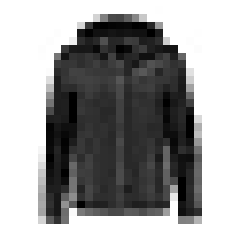

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

vérification des classes , en total on a 10 classe

In [9]:
y_train


array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

nommer les 10 classes

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

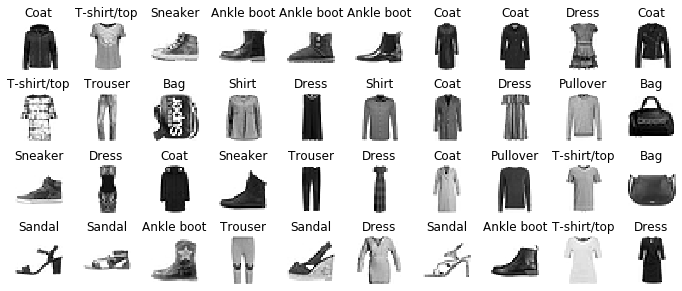

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construction du  Modèle

### model 1 (optimizer ADAM)

In [15]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28, 28]))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model1.layers

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
hidden1_model1 = model1.layers[1]

In [19]:
weights1, biases1 = hidden1_model1.get_weights()

In [20]:
weights1.shape

(784, 300)

In [21]:
biases1.shape

(300,)

## Formation et compilation

In [22]:
# with optimizer ADAM
model1.compile(loss="sparse_categorical_crossentropy",
            optimizer="Adam",
           metrics=["accuracy"])

In [23]:
history1 = model1.fit(X_train, y_train, batch_size=30, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.4874 - accuracy: 0.8241 - val_loss: 0.3864 - val_accuracy: 0.8552
Epoch 2/30
1834/1834 [==============================] - 5s 3ms/step - loss: 0.3680 - accuracy: 0.8644 - val_loss: 0.3489 - val_accuracy: 0.8746
Epoch 3/30
1834/1834 [==============================] - 5s 3ms/step - loss: 0.3282 - accuracy: 0.8792 - val_loss: 0.3287 - val_accuracy: 0.8834
Epoch 4/30
1834/1834 [==============================] - 5s 3ms/step - loss: 0.3071 - accuracy: 0.8873 - val_loss: 0.2996 - val_accuracy: 0.8916
Epoch 5/30
1834/1834 [==============================] - 5s 3ms/step - loss: 0.2843 - accuracy: 0.8947 - val_loss: 0.3131 - val_accuracy: 0.8878
Epoch 6/30
1834/1834 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.8992 - val_loss: 0.3027 - val_accuracy: 0.8930
Epoch 7/30
1834/1834 [==============================] - 5s 3ms/step - loss: 0.2593 - accuracy: 0.9031 - val_loss: 0.2945 - val_accuracy:

In [24]:
history1.params

{'verbose': 1, 'epochs': 30, 'steps': 1834}

In [25]:
print(history1.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [26]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## plot learning Curves

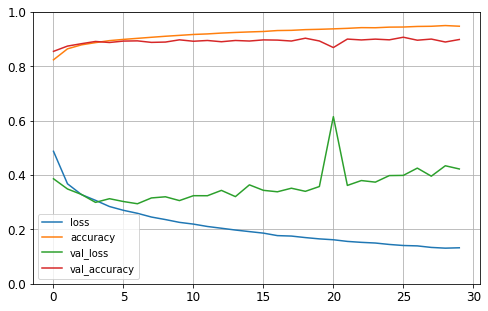

In [27]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## appliquer la prediction sur les données du test

In [28]:
predict_test1=model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8933


In [29]:
X_new = X_test[:3]


In [30]:
y_proba = model1.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_pred1 = model1.predict_classes(X_new)
y_pred1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [32]:
np.array(class_names)[y_pred1]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

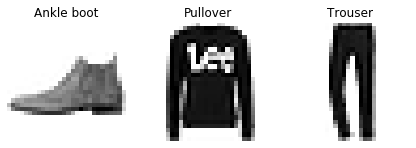

In [34]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### model 2 (optimizer stochastic gradient descent)

In [35]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

In [36]:
model2.layers

In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
hidden1_model2 = model2.layers[1]

In [39]:
weights2, biases2 = hidden1_model2.get_weights()

In [40]:
weights2

array([[-0.06188987,  0.03078071, -0.0116436 , ..., -0.02056277,
        -0.04766956,  0.03716654],
       [-0.04267802, -0.06821448,  0.05903344, ..., -0.02370716,
         0.02531915, -0.00453624],
       [-0.02377374, -0.05635609,  0.00452206, ..., -0.06514991,
        -0.06617848, -0.06555966],
       ...,
       [-0.02813648,  0.03183053,  0.03878612, ..., -0.06685881,
         0.0401952 , -0.03346665],
       [-0.07427444,  0.02129915, -0.01280435, ...,  0.0221287 ,
         0.02743587,  0.06581225],
       [ 0.04449228, -0.00814562, -0.00682849, ..., -0.06540206,
        -0.00849487, -0.03124463]], dtype=float32)

In [41]:
weights2.shape

(784, 300)

In [42]:
#with optimizer stochastic gradient descent
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [90]:
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0953 - accuracy: 0.9672 - val_loss: 0.3445 - val_accuracy: 0.8914
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0933 - accuracy: 0.9682 - val_loss: 0.3364 - val_accuracy: 0.8936
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0933 - accuracy: 0.9671 - val_loss: 0.3514 - val_accuracy: 0.8962
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9699 - val_loss: 0.3557 - val_accuracy: 0.8968
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9696 - val_loss: 0.3685 - val_accuracy: 0.8918
Epoch 6/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9699 - val_loss: 0.3619 - val_accuracy: 0.8948
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9695 - val_loss: 0.4480 - val_accuracy:

In [91]:
history2.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

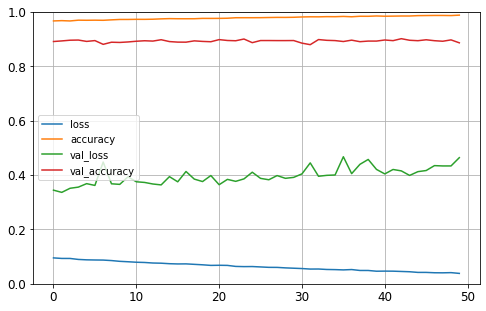

In [92]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [93]:
predict_test2=model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.8787


In [94]:
y_proba = model2.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [95]:
y_pred2 = model2.predict_classes(X_new)
y_pred2

array([9, 2, 1], dtype=int64)

In [96]:
np.array(class_names)[y_pred2]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

###  model 3 (optimizer RMSpop)

In [50]:
model3= keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[28, 28]))
model3.add(keras.layers.Dense(300, activation="relu"))
model3.add(keras.layers.Dense(100, activation="relu"))
model3.add(keras.layers.Dense(10, activation="softmax"))

In [51]:
model3.layers

In [52]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
hidden1_model3 = model3.layers[1]

In [54]:
weights3, biases3 = hidden1_model3.get_weights()

In [55]:
weights3

array([[-0.03782111,  0.06320509, -0.01225249, ..., -0.07356012,
         0.02368938, -0.01094083],
       [-0.05922364,  0.00799278, -0.05094597, ..., -0.05446816,
         0.04732507,  0.05880703],
       [-0.01185513,  0.04220903,  0.06117986, ..., -0.04335006,
        -0.0058448 , -0.03864067],
       ...,
       [-0.05937944, -0.00904763, -0.01944244, ..., -0.05272575,
        -0.05599725,  0.00030936],
       [-0.02397113, -0.07277533,  0.06415121, ...,  0.05758077,
        -0.01754013,  0.07432958],
       [-0.0457902 ,  0.05102524,  0.01342752, ...,  0.05236067,
         0.01215655,  0.05117767]], dtype=float32)

In [56]:
#with optimizer RMSprop
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [57]:
history3 = model3.fit(X_train, y_train, batch_size=30, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.5043 - accuracy: 0.8187 - val_loss: 0.4511 - val_accuracy: 0.8502
Epoch 2/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.3942 - accuracy: 0.8604 - val_loss: 0.4700 - val_accuracy: 0.8544
Epoch 3/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.3745 - accuracy: 0.8703 - val_loss: 0.4197 - val_accuracy: 0.8556
Epoch 4/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.3628 - accuracy: 0.8742 - val_loss: 0.4496 - val_accuracy: 0.8608
Epoch 5/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.3536 - accuracy: 0.8800 - val_loss: 0.3783 - val_accuracy: 0.8842
Epoch 6/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.3444 - accuracy: 0.8827 - val_loss: 0.6420 - val_accuracy: 0.8422
Epoch 7/30
1834/1834 [==============================] - 5s 3ms/step - loss: 0.3396 - accuracy: 0.8850 - val_loss: 0.4313 - val_accuracy:

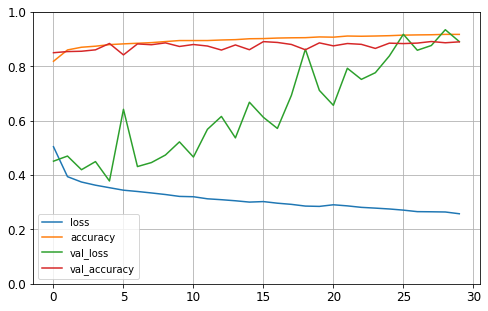

In [58]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
predict_test3=model3.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.8071 - accuracy: 0.8777


In [60]:
y_pred3 = model3.predict_classes(X_new)
y_pred3

array([9, 2, 1], dtype=int64)

In [61]:
y_proba = model3.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
np.array(class_names)[y_pred3]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

* en changeant les parametres des types de l'optimizer , et en fixant les parametres restants, on observe une accuracy plus grande chez l'optimizer ADAM.Donc on peut dire que Adam est le performant.(accuracy de Adam=0.89, l'accuracy de SGD =0.88, accuracy de RMSprop=0.87).
* en changeant le batch_size et en fixant les parametres restant(optimizer=SGD, epochs=30),l'accuracy s'augmente de 0.8855 à 0.8872, ce qui implique l'amélioration des performances.
* en changeant l epochs et en fixant les parametres restant(optimizer=SGD, batch_size=32),l'accuracy se diminue de 0.8855 à 0.8772, ce qui implique moins des performances.

## Model 4 avec plus de couches (layers) 

In [97]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[28, 28]))
model4.add(keras.layers.Dense(300, activation="relu"))
model4.add(keras.layers.Dense(300, activation="relu"))
model4.add(keras.layers.Dense(100, activation="relu"))
model4.add(keras.layers.Dense(10, activation="softmax"))

In [98]:
#keras.backend.clear_session()
np.random.seed(42)

In [99]:
hidden1_model4 = model4.layers[1]

In [100]:
weights4, biases4 = hidden1_model4.get_weights()

In [101]:
weights4

array([[ 0.05987516,  0.02091222, -0.01086789, ..., -0.03488328,
         0.04373468,  0.03649955],
       [ 0.02633057,  0.05588935, -0.05230799, ..., -0.01614593,
         0.06815478,  0.00610698],
       [-0.00019272, -0.03204717,  0.0416799 , ..., -0.001811  ,
        -0.01104181,  0.01099999],
       ...,
       [-0.00749256, -0.00707854,  0.03042454, ...,  0.05118784,
        -0.02281225, -0.01727326],
       [-0.03870315,  0.02787741,  0.0280251 , ...,  0.06430672,
        -0.0502013 ,  0.04102915],
       [ 0.05665213, -0.00992224, -0.059856  , ...,  0.03527068,
        -0.02873825,  0.02416011]], dtype=float32)

In [104]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])

In [105]:
history4 = model4.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0925 - accuracy: 0.9627 - val_loss: 0.4602 - val_accuracy: 0.9030
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0795 - accuracy: 0.9679 - val_loss: 0.4744 - val_accuracy: 0.9036
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0756 - accuracy: 0.9699 - val_loss: 0.4857 - val_accuracy: 0.9042
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9707 - val_loss: 0.5048 - val_accuracy: 0.9022
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0704 - accuracy: 0.9714 - val_loss: 0.5117 - val_accuracy: 0.9038
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0686 - accuracy: 0.9724 - val_loss: 0.5185 - val_accuracy: 0.9030
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0669 - accuracy: 0.9733 - val_loss: 0.5271 - val_accuracy:

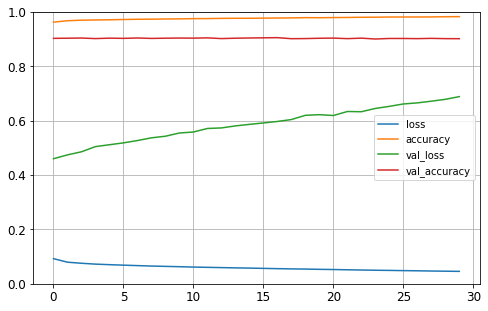

In [106]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [107]:
predict_test4=model4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7387 - accuracy: 0.8966


In [108]:
y_proba = model4.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [109]:
y_pred4 = model4.predict_classes(X_new)
y_pred4

array([9, 2, 1], dtype=int64)

In [110]:
np.array(class_names)[y_pred4]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Nous avons ajouté une couche cachée de 300 neurones , on remarque que l'accuracy est augmentée de 0.8852 à 0.89 .

## comparaison entre les 4 modèles

In [114]:
comp=[]
comp.append(predict_test1[1])
comp.append(predict_test2[1])
comp.append(predict_test3[1])
comp.append(predict_test4[1])

In [115]:
comp

[0.8932999968528748,
 0.8787000179290771,
 0.8776999711990356,
 0.8966000080108643]